In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [3]:
z = torch.zeros(5, 3).to(device)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')
torch.float32


In [4]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Maximum:  ', round(torch.cuda.max_memory_reserved(0)/1e+6,3), 'GB')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1e+6,3), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1e+6,3), 'GB')

NVIDIA GeForce GTX 960
Memory Usage:
Maximum:   2.097 GB
Allocated: 0.001 GB
Cached:    2.097 GB


In [5]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [6]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # additon allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [7]:
r = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.1841, -0.0563],
        [-0.4880, -0.4330]])

Absolute value of r:
tensor([[0.1841, 0.0563],
        [0.4880, 0.4330]])

Inverse sine of r:
tensor([[-0.1851, -0.0563],
        [-0.5098, -0.4479]])

Determinant of r:
tensor(0.0523)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.2625, -0.9649],
        [-0.9649,  0.2625]]),
S=tensor([0.6758, 0.0773]),
V=tensor([[ 0.7683,  0.6401],
        [ 0.6401, -0.7683]]))

Average and standard deviation of r:
(tensor(0.2045), tensor(-0.2903))

Maximum value of r:
tensor(-0.0563)


### Lenet-5

In [25]:
#Gray-Scale
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

#RGB
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0957, -0.0499, -0.0771,  0.0359,  0.0144,  0.0680,  0.0379,  0.0079,
         -0.1012, -0.1403]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [19]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [24]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

plane plane   car truck


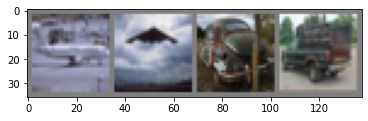

In [22]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.244
[1,  4000] loss: 1.227
[1,  6000] loss: 1.197
[1,  8000] loss: 1.194
[1, 10000] loss: 1.205
[1, 12000] loss: 1.175
[2,  2000] loss: 1.092
[2,  4000] loss: 1.099
[2,  6000] loss: 1.109
[2,  8000] loss: 1.098
[2, 10000] loss: 1.120
[2, 12000] loss: 1.119
[3,  2000] loss: 1.025
[3,  4000] loss: 1.031
[3,  6000] loss: 1.031
[3,  8000] loss: 1.060
[3, 10000] loss: 1.039
[3, 12000] loss: 1.039
[4,  2000] loss: 0.965
[4,  4000] loss: 0.976
[4,  6000] loss: 0.987
[4,  8000] loss: 1.004
[4, 10000] loss: 0.986
[4, 12000] loss: 0.981
[5,  2000] loss: 0.913
[5,  4000] loss: 0.929
[5,  6000] loss: 0.931
[5,  8000] loss: 0.948
[5, 10000] loss: 0.955
[5, 12000] loss: 0.922
[6,  2000] loss: 0.852
[6,  4000] loss: 0.880
[6,  6000] loss: 0.881
[6,  8000] loss: 0.933
[6, 10000] loss: 0.911
[6, 12000] loss: 0.915
[7,  2000] loss: 0.817
[7,  4000] loss: 0.838
[7,  6000] loss: 0.841
[7,  8000] loss: 0.885
[7, 10000] loss: 0.897
[7, 12000] loss: 0.884
[8,  2000] loss: 0.783
[8,  4000] 

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %
